# **Set Up 📡**

To ensure the **smooth operation** of this **notebook**, it is imperative to **load essential modules** and **libraries** central to our **machine learning** tasks.

The inclusion of modules such as **NumPy** for **numerical operations**, **Pandas** for **data manipulation**, and **Scikit-Learn** for **machine learning** implementations is **fundamental**. Additionally, setting up **hyperparameters and constants** tailored to our **specific tasks** provides a **standardized framework for experimentation and analysis.**

In [1]:
# General
import os
import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt


# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# Segementation Model
from sklearn.cluster import KMeans

# Dimensionality Reduction
from sklearn.manifold import TSNE

In [6]:
# Setting random seed for reproducibility
seed = 42
np.random.seed(seed)

# Constants
file_path = "/kaggle/input/ccdata/CC GENERAL.csv"

# **Unsupervised Learning and Segementation 🤖**

**Unsupervised Learning:**
---

- **Explanation:** **Unsupervised learning** is a type of **machine learning** where the **model learns patterns** and **structures** from unlabeled **data without explicit guidance or labeled outcomes**.

- **Task:** Its primary task involves **discovering inherent patterns**, **relationships**, or **structures within data**, such as **clustering similar data points together** or **reducing the dimensionality of the data.**

- **Models Used:** Common models include **Clustering Algorithms** like **K-means**, **Hierarchical Clustering**, and **Density-Based Spatial Clustering**. **Dimensionality Reduction** techniques such as **Principal Component Analysis (PCA)** and **t-distributed Stochastic Neighbor Embedding (t-SNE)** are also used.

- **Challenges:** Lack of labeled data poses a challenge as the model must autonomously discern meaningful patterns. Additionally, determining the **optimal number of clusters** or **dimensions can be challenging**.

- **Solutions:** Techniques like **elbow method** (for determining **optimal clusters**), **silhouette analysis**, and **autoencoders for unsupervised feature learning** can address challenges by aiding in **better understanding and extraction of meaningful patterns** from unlabeled data.

**Segmentation:**
---


- **Explanation:** **Segmentation** in **machine learning** refers to **partitioning or dividing an image**, **signal**, or **dataset** into **distinct segments** or **regions** based on **certain characteristics or features.**

- **Task:** Its primary task is to **identify and delineate areas of interest** or **relevance within data**, such as in **medical imaging** (identifying organs), **object detection** in **computer vision**, or **customer segmentation** in **marketing**.

- **Models Used:** **Deep Learning Models** like **Convolutional Neural Networks** (CNNs), **specifically U-Net**, **Mask R-CNN**, or **FCN** (Fully Convolutional Networks), are frequently used for **image segmentation tasks.**

- **Challenges:** Challenges include **precise boundary delineation**, handling variations in **shape and size**, and **ensuring accuracy**, especially in **complex or cluttered datasets.**

- **Solutions:** Augmenting data, using **transfer learning** with **pre-trained models**, employing **post-processing techniques** (like conditional random fields), and **leveraging ensemble methods** can **enhance segmentation accuracy and robustness.**

Both **unsupervised learning** and **segmentation tasks** are crucial in **extracting meaningful insights** and **organizing data** without explicit **supervision or labeled information**. Techniques and models in these **domains continue to evolve**, addressing **challenges and enhancing their applications across various fields.**

# **Marketing Segmentation Introduction 📚**

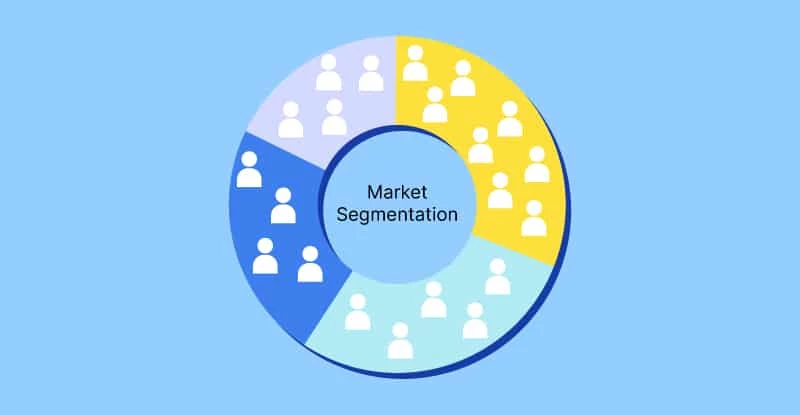

As a **data scientist** entrusted with this **critical task**, our objective is to **leverage a vast dataset** provided by the **bank to unveil significant insights** through **marketing segmentation**. By **categorizing customers into distinct groups**, we aim to offer the bank **invaluable perspectives** to tailor their **strategies, services, and offerings more effectively.**

1. **Understanding the Objective**
 * The primary goal is to categorize the bank's customers into at least three meaningful segments based on their behavior, preferences, and interactions with the bank's services. These segments should uncover new insights beyond the existing studies conducted by the bank.

2. **Methodology and Approach**
 * Our approach involves employing sophisticated data analysis techniques, possibly utilizing unsupervised learning algorithms like clustering, to identify natural groupings or clusters within the customer dataset. Through this, we aim to reveal underlying patterns or similarities among customers.

3. **Delivering Actionable Insights**
 * By delineating these distinct customer groups, the bank can:
    * Tailor marketing strategies: Customizing promotions, offers, and communication strategies specific to each segment's preferences and needs.
    * Enhance customer experience: Developing personalized services and products to cater to the identified segments.
    * Optimize resource allocation: Allocating resources efficiently by understanding the priorities and demands of each segment.

4. **Potential Challenges and Solutions**
 * Potential challenges might include handling high-dimensional data, determining the optimal number of segments, and interpreting the results accurately. Addressing these challenges may involve dimensionality reduction techniques, evaluating clustering validity metrics, and utilizing domain expertise for result interpretation.

5. **Expected Outcomes**
 * Through the successful execution of marketing segmentation, the bank anticipates uncovering nuanced customer profiles and behaviors, paving the way for targeted marketing campaigns, improved customer retention, and enhanced overall business strategies.

This strategic initiative in marketing segmentation aims to empower the bank with a deeper understanding of its customer base, fostering better decision-making and customer-centric approaches across various operational facets.

# **Loading & pre-processing Dataset 🗃️**

In [7]:
# Loading data into a data frame
df = pd.read_csv(file_path)

# Quick look
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
features = list(df.columns)
n_features = len(features)
n_samples = len(df)

print(f"Number of features : {n_features}")
print(f"Number of Samples  : {n_samples}")
print("Features  : ")
for index, feature in enumerate(features):
    print(f"{index+1:2}. {feature}")

Number of features : 18
Number of Samples  : 8950
Features  : 
 1. CUST_ID
 2. BALANCE
 3. BALANCE_FREQUENCY
 4. PURCHASES
 5. ONEOFF_PURCHASES
 6. INSTALLMENTS_PURCHASES
 7. CASH_ADVANCE
 8. PURCHASES_FREQUENCY
 9. ONEOFF_PURCHASES_FREQUENCY
10. PURCHASES_INSTALLMENTS_FREQUENCY
11. CASH_ADVANCE_FREQUENCY
12. CASH_ADVANCE_TRX
13. PURCHASES_TRX
14. CREDIT_LIMIT
15. PAYMENTS
16. MINIMUM_PAYMENTS
17. PRC_FULL_PAYMENT
18. TENURE


In our data, we have a **total of 18 features** and **roughly 9000 samples**, which is a **pretty good balance**. These 18 features have their own unique meanings:

1. **CUST_ID:** Unique identifier for each customer.
2. **BALANCE:** The current balance amount in the account.
3. **BALANCE_FREQUENCY:** Frequency of updating the balance.
4. **PURCHASES:** Total amount of purchases made.
5. **ONEOFF_PURCHASES:** Amount of purchases made in one go.
6. **INSTALLMENTS_PURCHASES:** Amount of purchases made in installments.
7. **CASH_ADVANCE:** Cash advances taken from the account.
8. **PURCHASES_FREQUENCY:** Frequency of purchases.
9. **ONEOFF_PURCHASES_FREQUENCY:** Frequency of one-off purchases.
10. **PURCHASES_INSTALLMENTS_FREQUENCY:** Frequency of installment purchases.
11. **CASH_ADVANCE_FREQUENCY:** Frequency of cash advances.
12. **CASH_ADVANCE_TRX:** Number of transactions involving cash advances.
13. **PURCHASES_TRX:** Number of purchase transactions made.
14. **CREDIT_LIMIT:** Limit of credit on the account.
15. **PAYMENTS:** Total payments done by the customer.
16. **MINIMUM_PAYMENTS:** Minimum payments due from the customer.
17. **PRC_FULL_PAYMENT:** Percentage of the full payment paid by the customer.
18. **TENURE:** Duration of account tenure with the bank.

These features encompass a wide range of financial behaviors and patterns, offering insights into customer spending habits, payment behaviors, credit limits, and account tenure with the bank.

In [9]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
# Data frame statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Let's encapsulate the key insights from the mean values of these features:

1. The average balance across customers stands at approximately \$1564.47, reflecting the typical amount held in their accounts.

2. Customers tend to update their balance frequency, on average, around 88% of the time.

3. The mean purchases made by customers amount to about \$1003.20, indicating their average spending behavior.

4. On average, customers make one-off purchases totaling around \$592.44, showing occasional substantial purchase behavior.

5. Installment-based purchases, averaging around \$411.07, represent a significant portion of customer spending.

6. Customers utilize cash advances averaging \$978.87, indicating occasional use of this financial service.

7. The mean purchase frequency among customers is approximately 49%, showcasing their regularity in making purchases.

8. For one-off purchases, customers have an average frequency of around 20%, demonstrating sporadic large-value purchases.

9. Installment purchases have an average frequency of about 36%, indicating a consistent pattern of spreading payments.

10. The mean cash advance frequency stands at approximately 14%, denoting occasional utilization of this service.

11. Customers typically engage in around 3.25 cash advance transactions, on average, portraying the frequency of such transactions.

12. On average, customers engage in around 14.71 purchase transactions, signifying their overall buying activity.

13. The mean credit limit assigned to customers is approximately \$4494.45, setting their maximum spending threshold.

14. Customers make average payments of \$1733.14, reflecting their typical payment behavior.

15. The mean minimum payments by customers amount to approximately \$864.21, showcasing their usual minimum payment obligations.

16. Customers tend to pay approximately 15% of their full credit balance on average, reflecting their tendency towards partial payments.

17. The average tenure of customers with the bank is around 11.52, indicating the typical duration of their relationship with the institution.

In [11]:
# Check for null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Upon meticulous examination of our dataset, it has been discerned that the **'Minimum Payments'** feature exhibits **313 null values**, while the **'Credit Limit'** feature manifests a **solitary null value**.

A strategic approach to handle these discrepancies involves understanding **the essence of 'Minimum Payments'** before addressing the **imputation process for the null values**.

In [12]:
# Check for duplicate Values
df.duplicated().sum()

0

**Null values** are present in **our dataset**, but the **bright side** is the **absence of duplicates**. Each sample is unique, which is beneficial for our analysis.

In [13]:
df.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

The **descriptive analysis** of the **'Minimum Payments'** feature reveals a **notable observation**: the **minimum value centers around 864**, while an **outlier looms significantly higher at 76,000+**. This **outlier starkly contrasts with the 75th percentile value of 825**, suggesting a **potential anomaly** within the dataset.

Further **scrutiny during specific column analyses** will elucidate whether this **high value indeed qualifies as an outlier** or if it represents an **inherent property of the feature**.

For immediate handling of **missing values**, the feature's relatively strict range allows for a pragmatic approach—utilizing the **mean value** for **imputation**, maintaining the **integrity of the dataset within the defined range.**

In [14]:
# Fill the missing values with the mean value
simple_imputer = SimpleImputer(strategy="mean")
df.MINIMUM_PAYMENTS = simple_imputer.fit_transform(df.MINIMUM_PAYMENTS.to_numpy().reshape(-1,1))

# Confirmation of the Imputation
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
# Drop this single row with the null value
df.dropna(inplace=True)

# Confirmation
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

We've **effectively addressed** all **missing values** within our dataset. While **scaling the data won't directly impact our data analysis** techniques, it's an **essential step** to align our dataset with **machine learning models**.

**Standardizing** the data through **scaling** ensures **uniformity** in the **magnitude of values**, a **prerequisite for optimizing the performance of machine learning models**. By **scaling the data**, we facilitate a **level playing field** for the **features**, enhancing the models' ability to **discern patterns** and **relationships** across the **dataset**. This step doesn't alter the **inherent characteristics** of **our data** but rather **ensures compatibility** with **machine learning algorithms**, potentially augmenting their **predictive capabilities**.

In [16]:
# Take a copy of the original data set
data = df.copy()

# Drop the unnecessary columns
data.drop(columns = features[0], inplace = True)

# Apply normalization
norm_data = normalize(data)

# Initialize standards scaler and apply it
scaler = StandardScaler()
scaled_data = scaler.fit_transform(norm_data)

# Final dataset
scaled_data

array([[-0.9418589 ,  2.51351895, -0.36811698, ..., -0.02637805,
        -0.38761659,  3.01516256],
       [ 0.22152701, -0.74991997, -0.92500711, ..., -0.25090963,
        -0.20776637, -0.79553516],
       [ 0.29887531, -0.55916806, -0.34071246, ..., -0.37793698,
        -0.38761659, -0.65195208],
       ...,
       [-1.01764362,  2.62400729, -0.0723584 , ..., -0.36490662,
         1.75829814,  0.93323231],
       [-1.00049826,  6.47911281, -0.92500711, ..., -0.17891966,
         3.95805132,  3.11721441],
       [-0.26970397,  0.40931793,  2.39229148, ..., -0.59088656,
        -0.38761659, -0.10245973]])

At this moment, we have successfully performed all the preprocessing steps that are necessary.

# **Exploratory Data Analysis 📊**

Now that we've completed **preprocessing**, we're ready to **analyze specific features and their correlations**. This step helps us **understand hidden patterns, detect outliers, and grasp the dataset's structure better**. It's crucial for **feature analysis** and **identifying meaningful connections between variables.**

In [17]:
def hist(feature, data_frame):
    """
    Generate a histogram for a specific feature in a DataFrame.

    Args:
    - feature: str, the column name to plot as a histogram.
    - data_frame: pandas DataFrame, the DataFrame containing the feature.

    Returns:
    - Displays a histogram using Plotly.
    """
    fig = px.histogram(
        data_frame=data_frame,
        x=feature,
        title="{} Histogram".format(feature.title()),
        text_auto=True,
        marginal="rug",
        height=500
    )
    fig.show()

def box(feature, data_frame):
    """
    Generate a box plot for a specific feature in a DataFrame.

    Args:
    - feature: str, the column name to plot as a box plot.
    - data_frame: pandas DataFrame, the DataFrame containing the feature.

    Returns:
    - Displays a box plot using Plotly.
    """
    fig = px.box(
        data_frame=data_frame,
        x=feature,
        title="{} Box Plot".format(feature.title()),
        notched=True,
        height=500
    )
    fig.show()

def violin(feature, data_frame):
    """
    Generate a violin plot for a specific feature in a DataFrame.

    Args:
    - feature: str, the column name to plot as a violin plot.
    - data_frame: pandas DataFrame, the DataFrame containing the feature.

    Returns:
    - Displays a violin plot using Plotly.
    """
    fig = px.violin(
        data_frame=data_frame,
        x=feature,
        title="{} Violin Plot".format(feature.title()),
        height=500,
    )
    fig.show()

def feature_analysis(index, data_frame = df):
    """
    Generate box plot, histogram, and violin plot for a specific feature.

    Args:
    - index: int, the index of the feature to analyze.
    - data_frame: pandas DataFrame, the DataFrame containing the features.

    Returns:
    - Displays box plot, histogram, and violin plot using Plotly.
    """
    hist(features[index], data_frame)
    box(features[index], data_frame)
    violin(features[index], data_frame)

In [18]:
feature_analysis(1)

Unexpectedly, the **histogram sheds light** on an **intriguing pattern** in the **balance distribution**. A pronounced **concentration** is evident in the range of **0 to 100**, indicating that a **significant portion** of **users maintains a balance below 100**—a deviation from the anticipated distribution.

Further scrutiny of the **histogram reveals** a distinct **rightward skewness**, corroborated by insights from both the **box plot** and the **violin plot**. These visualizations expose a **multitude of outliers** or **values that deviate significantly from the expected growth range.**

Moreover, the **histogram** and the **violin plot** hint at the **formation of two subgroups**. The **predominant subgroup** materializes within the **0 to 100** range, portraying a **pronounced presence**.

Contrastingly, the **second subgroup** emerges tentatively in the **range of 900 to 1100**, albeit with a **smaller footprint**. This nuanced analysis unravels the **intricate structure** of **the dataset**.

In [19]:
feature_analysis(2)

Examining the **histogram**, **box plot**, and **violin plot** of the **'Balance Frequency'** feature reveals a **notable trend**: a **substantial majority**, nearly **6,200 individuals**, maintain a commendable **balance frequency of **0.99 to 1—**an indication of **strong financial behavior**.

However, concurrently, there **exist users with frequencies on the extreme left**, notably below **0.2 or 0.4**. These instances can be considered **outliers**, underscoring the **dataset's diverse nature with a broad distribution range.**

While the **employment of clustering methods** may **shed light** on the **presence of distinct subgroups**, the **diversity observed** in the **feature distribution** suggests the **existence of values** that **deviate from the norm**. Unraveling the **impact of these values** on **clustering outcomes** will be **an intriguing avenue for further exploration.**

In [20]:
feature_analysis(9)

Upon reviewing the **violin plot** for the **'Purchase Installments Frequency',** distinct **subgroups come to the fore**. The **first subgroup** prominently **emerges at 0**, boasting a **substantially high count,** suggesting that a significant portion of individuals tends to avoid installment-based purchases.

Conversely, the **second subgroup** materializes at **1**, albeit with a **comparatively lower count,** indicating a smaller but notable segment of users who frequently engage in installment-based purchases.

Between these **two subgroups**, a **uniform distribution** is **maintained**, underscoring the **presence of a structured pattern** within the data. This pattern suggests a clear demarcation between users who predominantly refrain from installment-based purchases and those who actively participate in such transactions. Understanding these subgroups provides valuable insights into the diverse purchasing behaviors present within the dataset.

---

**Nearly every feature** in the **dataset** exhibits a **considerable degree of skewness**, complicating the **decision-making process solely based on data visualizations**. The **pronounced skewness** poses **challenges in drawing conclusive** insights from **visualizations alone**.

A **more direct** and **effective approach** involves **venturing into clustering techniques**. By **applying clustering algorithms**, we can **systematically discern patterns** and **structures within the dataset**, gaining a **nuanced understanding** of the **impact of these markedly diverse values.** This method promises to **unveil inherent structures** in the data that **might not be immediately apparent** through **visual inspections**, facilitating a more **informed decision-making process**.

# **K-Means Clustering 🍙**

**K-Means Clustering** is a **popular unsupervised machine learning** algorithm used for **partitioning a dataset** into a **predefined number of clusters**. The primary goal is to **group data points** that are **similar to each other while minimizing the variance within each cluster**. Here's a step-by-step explanation of how K-Means Clustering works:

1. **Initialization:**
   - Choose the number of clusters (K) that you want to create.
   - Randomly initialize K centroids, where each centroid represents the center of one cluster.

2. **Assign Points to Clusters:**
   - For each data point in the dataset, calculate the distance to each centroid.
   - Assign the point to the cluster whose centroid is the closest (usually using Euclidean distance).

3. **Update Centroids:**
   - Recalculate the centroids of the clusters by taking the mean of all data points assigned to each cluster.
   - The new centroids become the updated cluster centers.

4. **Repeat:**
   - Repeat steps 2 and 3 until convergence. Convergence occurs when the assignment of points to clusters and the positions of centroids stabilize.

5. **Final Clusters:**
   - Once the algorithm converges, the final clusters are formed, and each data point is assigned to one of these clusters.

**Key Points:**

- **Choice of K:**
  - Selecting the right number of clusters (K) is a critical decision in K-Means Clustering.
  - Techniques like the elbow method, silhouette analysis, or cross-validation can be used to determine the optimal value for K.

- **Sensitivity to Initial Centroids:**
  - K-Means is sensitive to the initial placement of centroids. Different initializations may result in different final clusters.

- **Scaling:**
  - It's advisable to scale features before applying K-Means to ensure that all features contribute equally to the distance calculations.

- **Speed and Efficiency:**
  - K-Means is computationally efficient and suitable for large datasets. However, its performance can degrade with high-dimensional or non-spherical clusters.

---

The **Elbow method** is a **technique** used to determine the **optimal number of clusters (K)** in a dataset for a **clustering algorithm**, such as **K-Means**. The method involves **fitting the clustering algorithm** for **different values** of **K** and plotting the **resulting sum of squared distances (inertia)** as a function of **K**. The **"elbow"** of the **plot** represents the **point** where adding **more clusters** **doesn't significantly reduce the inertia**, suggesting a **suitable number of clusters**.

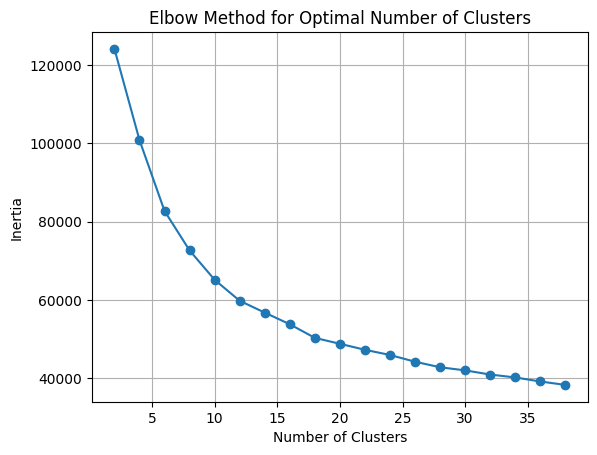

In [21]:
# Range of clusters to try
num_clusters_range = range(2, 40, 2)

# Initialize an empty list to store inertia values
inertia_values = []

# Iterate over different numbers of clusters and fit K-Means
for num_clusters in num_clusters_range:
    k_means = KMeans(
        n_clusters = num_clusters,
        random_state = 42,
        n_init = "auto"
    )
    k_means.fit(scaled_data)
    inertia_values.append(k_means.inertia_)

# Plot the Elbow curve
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Analyzing the **scatter-line plot** resulting from the **Elbow method**, a discernible **observation emerges**: beyond **10 or perhaps 12 clusters**, the **reduction in inertia** becomes **less pronounced**. This implies that **the optimal number of clusters** can be reasonably **settled upon**, and in this instance, a choice of **10 clusters appears** appropriate for the **K-Means clustering method**.

In [22]:
# Initialize the final K Means Model
k_means = KMeans(
    n_clusters = 10,
    n_init = 'auto',
    random_state = 42
)

# Fit / Train the model
k_means.fit(scaled_data)

KMeans(n_clusters=10, n_init='auto', random_state=42)

**t-SNE** is a **dimensionality reduction technique** used for **visualizing high-dimensional data** in **lower-dimensional spaces, typically 2D or 3D**. It is particularly **effective in revealing** the **underlying structure** and **relationships** within the data.

**t-SNE** works by **modeling pairwise similarities** between data points in the **high-dimensional space** and the **low-dimensional space**, aiming to **preserve local similarities** while reducing the **impact of global structures**.

While **t-SNE** is **renowned** for its ability to produce **visually compelling embeddings** that capture **intricate patterns**, it is acknowledged for its **computational intensity**. The **algorithm tends** to be **slow, especially for large datasets**, due to its **quadratic time complexity.**

In [23]:
# Get cluster labels
cluster_labels = k_means.labels_

# Apply t-SNE to reduce the dimensionality to 3
tsne = TSNE(
    n_components=3,
    random_state=42
)
tsne_result = tsne.fit_transform(scaled_data)

In [24]:
# Apply t-SNE to reduce the dimensionality to 2
tsne = TSNE(
    n_components=2,
    random_state=42
)
tsne_result_2d = tsne.fit_transform(scaled_data)

In [25]:
# Visualizing t-SNE reduction
tsne_3d_fig = px.scatter_3d(
    x = tsne_result[:, 0],
    y = tsne_result[:, 1],
    z = tsne_result[:, 2],
    color = cluster_labels,
    title = "t-SNE Cluster Visualization"
)
tsne_3d_fig.show()

In [26]:
# Visualizing t-SNE reduction
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = cluster_labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()

While an **external observation** of the **clusters** reveals **apparent clarity** in their **boundaries**, a **closer inspection** in both the **3-dimensional and 2-dimensional** plots exposes an **intricate intermingling of some clusters**.

Notably, **Cluster 9** stands out due to its **unique characteristics**. Despite its **confined presence** in a **specific region resembling** a **typical cluster**, it exhibits a **distinctive property** by **extending its influence to other areas**. This **anomaly sparks curiosity**, prompting a **deeper investigation** into the **nature of Cluster 9**.

Conversely, **Cluster 1** appears to be **the most expansive**, encompassing a **significant number** of **data points**. Its **extensive distribution** across the **plot signifies** a **broad influence**, possibly indicating its **prevalence across multiple dimensions** or **features within the dataset**.

This **nuanced understanding** of **cluster behaviors** underscores the **complexity within the data** and **paves the way** for **further exploration** to unveil the **underlying patterns and relationships.**

# **Summary 💡**

In this comprehensive notebook, our journey unfolded with a **meticulous setup**, **exploring the realms of market segmentation** and **unsupervised learning**. **Laden with 18 features and 8950 samples**, our dataset underwent a thorough **examination** through **descriptive statistics and visualization**.

As we delved into canine clustering, **K-Means emerged as the cornerstone**, **proficiently categorizing customers into distinct clusters**. The **Elbow Method** guided our quest, pinpointing the **optimal number of clusters**. Despite the consideration of **alternative methods** like **DBSCAN and Mean Shift**, **K-Means** proved its **mettle**, outshining competitors in **unraveling the complex structures** embedded within the data.

This summary encapsulates our foray, underscoring the **pivotal role of K-Means clustering in extracting meaningful insights from the dataset, ultimately standing as the method of choice amid the alternatives explored.**